In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import os
from reload_recursive import reload_recursive
import helpers
import pyperclip

from mri_data import file_manager as fm
from mri_data import utils

In [5]:
drive_root = fm.get_drive_root()
msmri_home = Path("/home/srs-9/Projects/ms_mri")
msmri_datadir = msmri_home / "data"
curr_dir = Path("/home/srs-9/Projects/ms_mri/analysis/paper1")
data_dir = curr_dir / "data0"
showfigs = False
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.precision = 3

In [14]:
df1 = pd.read_csv(data_dir / "t1_data_full.csv")
df1.set_index('subid', inplace=True)
df1 = helpers.set_dz_type5(df1)

df2 = pd.read_csv(data_dir / "t1_2_data_full.csv")
df2.set_index('subid', inplace=True)
df2 = helpers.set_dz_type5(df2)

(array([  1.,  25.,  47., 107., 110.,  57.,  45.,  16.,   2.,   2.]),
 array([ 189.424896 ,  589.4097013,  989.3945066, 1389.3793119,
        1789.3641172, 2189.3489225, 2589.3337278, 2989.3185331,
        3389.3033384, 3789.2881437, 4189.272949 ]),
 <BarContainer object of 10 artists>)

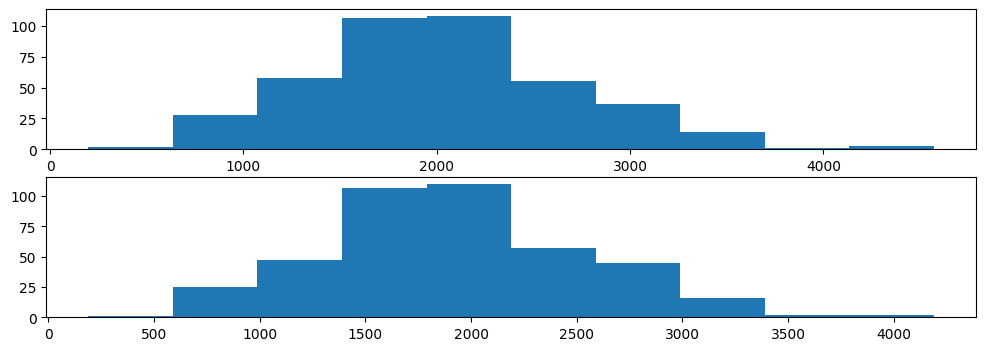

In [7]:
fig, axs = plt.subplots(2,1,figsize=(12, 4))

axs[0].hist(df1.loc[df1['dz_type5'].isin(["RMS", "PMS"]), 'choroid_volume'])
axs[1].hist(df2.loc[df2['dz_type5'].isin(["RMS", "PMS"]), 'choroid_volume'])

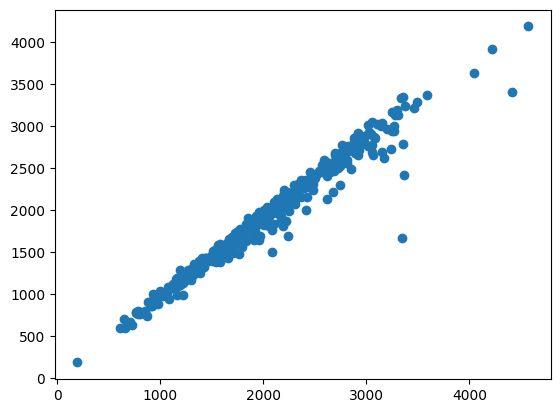

In [8]:
plt.scatter(df1.loc[df1['dz_type5'].isin(["RMS", "PMS"]), 'choroid_volume'], 
            df2.loc[df2['dz_type5'].isin(["RMS", "PMS"]), 'choroid_volume'])

(array([52., 18.,  9.,  3.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([ -12.287719 ,  156.1086433,  324.5050056,  492.9013679,
         661.2977302,  829.6940925,  998.0904548, 1166.4868171,
        1334.8831794, 1503.2795417, 1671.675904 ]),
 <BarContainer object of 10 artists>)

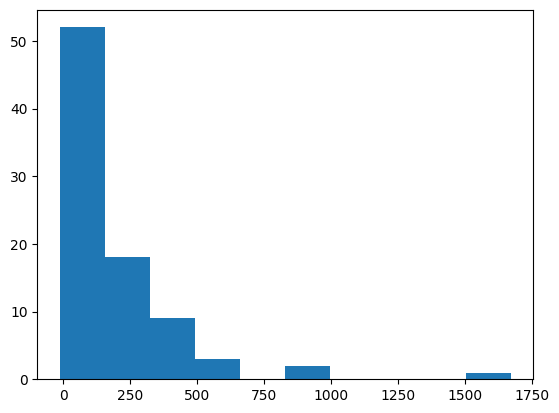

In [9]:
plt.hist((df1.loc[df1['dz_type5'].isin(["PMS"]), 'choroid_volume'] - df2.loc[df2['dz_type5'].isin(["PMS"]), 'choroid_volume']))

In [15]:
df = pd.DataFrame()
df['choroid_volume1'] = df1['choroid_volume']
df['choroid_volume2'] = df2['choroid_volume']
df['cp_diff'] = df['choroid_volume1'] - df['choroid_volume2']

In [13]:
df = df.sort_values(by="cp_diff", ascending=False)

In [20]:
sub = 1370

dataroot = drive_root / "3Tpioneer_bids"
labelroot = drive_root / "srs-9/3Tpioneer_bids_predictions"
label1 = labelroot / df1.loc[sub, 'sub-ses'] / df1.loc[sub, 'label']
label2 = labelroot / df2.loc[sub, 'sub-ses'] / df2.loc[sub, 'label']
t1 = dataroot / df1.loc[sub, 'sub-ses'] / "t1.nii.gz"
flair = dataroot / df1.loc[sub, 'sub-ses'] / "flair.nii.gz"

cmd = utils.open_itksnap_workspace_cmd(images=[t1, flair], labels=[label1, label2], win=True)
pyperclip.copy(cmd)
print(cmd)

itksnap -g H:/3Tpioneer_bids/sub-ms1370/ses-20210421/t1.nii.gz -o H:/3Tpioneer_bids/sub-ms1370/ses-20210421/flair.nii.gz -s H:/srs-9/3Tpioneer_bids_predictions/sub-ms1370/ses-20210421/t1_choroid_pineal_pituitary_T1-1_pred.nii.gz H:/srs-9/3Tpioneer_bids_predictions/sub-ms1370/ses-20210421/t1_choroid_pineal2_pituitary_T1-1_pred.nii.gz
